# Lab 6:  Implement your own version of K-means

In class we have discussed how the K-means algorithm works, and you can read more about it in the text.  Your task this week is to implement your own version of K-means, and use it to cluster faces in the Olivetti dataset.  

You can work on this task either by yourself, or with one or two partners.  Please do *not* have a groupsize larger than 3, however.  Submission instructions are on Canvas.


# Part I:  Implement K-means

Your task is to implement a function called `get_clusters` that takes in a set of data and a number of clusters, and returns the centroids of those clusters, as well as the closest centroid for each data point.  Your code should make use of reasonable subfunctions, use good choices of variables, and be commented as necessary.

In [12]:
import numpy as np
import random as rd

In [ ]:
class Cluster:
  def __init__(self, c):
    self.centroid = c
    self.points_list = []

  def remove_point(self, p):
    self.points_list.remove(p)

In [20]:
import numpy as np
import random as rd

#Step 1: Pick points for cluster
#Step 2: Iterate through all data assign to closest cluster
#Step 3: Calculate means of clusters and use as new centroid
#Step 4: Repeat step 2 until means no longer change
#Step 5: Repeat from step one until cluster with lowest variance is found

#Takes cluster objects array and an tuple for a point as arguments
# returns index of closest centroid
def get_closest_centroid(clusters, point):

  closest = np.linalg.norm(clusters[0] - point)
  closest_index = 0
  for i in range(len(clusters)):
    dist = np.linalg.norm(clusters[i] - point)
    if dist < closest:
      closest = dist
      closest_index = i

  return i

# def get_average_point(points_list, centroid_id):
#   avg = []

#   #initialize average points dimensions to first point in points list
#   for i in range(len(points_list[0])):
#       avg.append(0)

#   #iterates through points in list
#   for i in range(len(points_list)):
#     for j in range(len(points_list[i])):
#       sum = avg[j] * (i + 1)
#       sum = sum + points_list[i][j]
#       avg[j] = sum / (i + 2)

#   return avg

def get_average_point(data, closest_centroids, centroid_id):
  avg = []

  #initialize average points dimensions to first point in points list
  for i in range(len(data[0])):
    if closest_centroids[i] == centroid_id:
      avg.append(0)

  #iterates through points in list
  for i in range(len(data)):
    if closest_centroids[i] == centroid_id:
      for j in range(len(data[i])):
        sum = avg[j] * (i + 1)
        sum = sum + data[i][j]
        avg[j] = sum / (i + 2)

  return avg

def get_clusters(data: np.ndarray, n_clusters: int) -> tuple[np.ndarray, np.ndarray]:
  # Fill in the details.  This function should probably consist of some kind of loop,
  # and the work within that loop should mostly be done via calls to other functions
  # that you define and that carry out small, specific tasks

  # error check for apporpriate ndarray dimensions
  if len(data.shape) > 2:
    print("Error: ND Array dimensions > 2")
    return

  # initialize lists to be returned
  init_clusters = []
  closest_centroids = []

  # Fill list with 0's to the same length as data so they can be indexed the same
  for i in range(len(data)):
    closest_centroids.append(0)

  # pick random clusters
  for i in range(n_clusters):
    # j = rd.randint(0, len(data))
    # init_clusters.append(data[j])
    init_clusters.append(rd.choice(i))

  for i in range(1000):
    # assign every point in data to a cluster
    for j in range(len(data)):
      index = get_closest_centroid(init_clusters, data[j])
      #init_clusters[index].points_list.append(point)
      closest_centroids[j] = index

    #iterate through all clusters and new centroid from average of all points
    for i in range(len(init_clusters)):
      init_clusters[i] = get_average_point(data, closest_centroids, i)


  # Return the centroids and the closest centroid for each datapoint
  return init_clusters, closest_centroids



In [21]:
import numpy as np

random_data = np.random.randint(0, 10, size=(10, 2))
# random_data.fill(random.randint(0,10))
random_data

get_clusters(random_data, 3)

TypeError: object of type 'int' has no len()

# Part II:  Use your code to cluster the Olivetti dataset

Now use your clustering code to cluster the following pseudo-random data.  Examine the following questions:
* How well does your code do if you try to use 4 clusters?
* How well does it do if you use a different number of clusters?  Show how some perforamance metric changes over the number of clusters
* What happens if you modify the data to be either more or less overlapped?  (You can do this by adjusting the 'cluster_center' variable, or the covs)?

Note:  if you had any issues with the implementation in Part I, just use the default KMeans class from SKLearn for this part

In [ ]:
import pandas as pd
import seaborn as sns

### Generate psuedo random clusters

In [ ]:
# These are the "actual" centers in the x-y plane
cluster_centers = [
    (0, 0),
    (2, 0),
    (0, 1),
    (3, 2)
]
# The values change how "spread out" the data is.  Feel feel to play with them.
# The bigger the values, the more spread out the data points.  These values need to represent
# symmetric matrices
covs = [
    [[.25, 0], [0, .3]],
    [[.5, .1], [.1, .5]],
    [[.25, 0], [0, .25]],
    [[.5, 0], [0, .5]],
]
n_pts_per_cluster = 20

data = []
for ix, cluster in enumerate(cluster_centers):
    cov = covs[ix]
    samples = np.random.default_rng().multivariate_normal(mean=cluster, cov=cov, size=20)
    data += [(ix, s[0], s[1]) for s in samples]

data = pd.DataFrame(data, columns=['label', 'x', 'y'])


### Visualze the data

<Axes: xlabel='x', ylabel='y'>

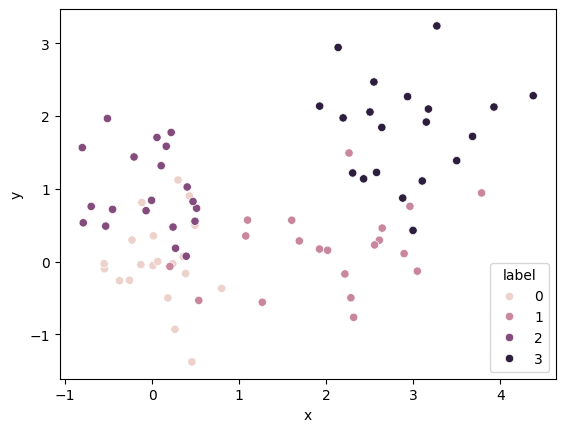

In [ ]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)

### Experiment with clustering here